## Appliances Energy Prediction

### Linear Regression Project

### Contents

1.Introduction

2.Goal of The Project

3.General View of Data

4.Data Cleaning

5.Exploring the Data

6.Building Models

7.Results

### 1. Introduction
We have worked on estimating appliances energy. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods.

### 2. Goal of The Project
In this project, we are going to build a regression model for predicting appliances energy. Target variable is energy consumption of appliances, Appliances column in data.

### 3. General View of the Data
#### Parameters
1. Appliances, energy use in Wh
2. lights, energy use of light fixtures in the house in Wh
3. T1, Temperature in kitchen area, in Celsius
4. RH_1, Humidity in kitchen area, in %
5. T2, Temperature in living room area, in Celsius
6. RH_2, Humidity in living room area, in %
7. T3, Temperature in laundry room area
8. RH_3, Humidity in laundry room area, in %
9. T4, Temperature in office room, in Celsius
10. RH_4, Humidity in office room, in %
11. T5, Temperature in bathroom, in Celsius
12. RH_5, Humidity in bathroom, in %
13. T6, Temperature outside the building (north side), in Celsius
14. RH_6, Humidity outside the building (north side), in %
15. T7, Temperature in ironing room , in Celsius
16. RH_7, Humidity in ironing room, in %
17. T8, Temperature in teenager room 2, in Celsius
18. RH_8, Humidity in teenager room 2, in %
19. T9, Temperature in parents room, in Celsius
20. RH_9, Humidity in parents room, in %
21. T_out, Temperature outside (from Chievres weather station), in Celsius
22. Press_mm_hg (from Chievres weather station), in mm Hg
23. RH_out, Humidity outside (from Chievres weather station), in %
24. Windspeed (from Chievres weather station), in m/s
25. Visibility (from Chievres weather station), in km
26. Tdewpoint (from Chievres weather station), Â°C
27. rv1, Random variable 1, nondimensional
28. rv2, Random variable 2, nondimensional
29. date, time year-month-day hour:minute:second


For more information visit the page https://www.kaggle.com/loveall/appliances-energy-prediction

In [1]:
# Importing libraries we will use.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from scipy.stats.mstats import winsorize

In [3]:
df=pd.read_csv('appliances-energy.csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

### 4. Data Cleaning

In [6]:
#Number of the null values in all columns
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)],
    axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records,Percentage (%)


In [7]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [8]:
#Due to lot of zero enteries, this column is of not much use and will be ignored in rest of the model.
df.drop(columns='lights',axis=1,inplace=True)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df= df.set_index('date')
df.index.name ='time'
df['date'] = df.index.date
df['day'] = df.index.day
df['month'] = df.index.month
df['hour'] = df.index.hour

In [10]:
# We have classified the Data Set according to month, day, hour.

In [11]:
df2=pd.concat([df.groupby(['month','day','hour']).Appliances.sum(),
           df.groupby(['month','day','hour']).mean().drop('Appliances',axis=1)],axis=1)
df2.head(10)

Appliances         T1       RH_1         T2       RH_2  \
month day hour                                                           
1     11  17           330  19.890000  46.502778  19.200000  44.626528   
          18          1060  19.897778  45.879028  19.268889  44.438889   
          19          1040  20.495556  52.805556  19.925556  46.061667   
          20           750  20.961111  48.453333  20.251111  45.632639   
          21           620  21.311667  45.768333  20.587778  44.961111   
          22          1600  21.572222  44.663333  20.905556  44.118889   
          23           340  21.531667  44.271111  20.934444  43.712500   
      12  0            850  21.266111  44.960556  20.637222  44.018333   
          1           1010  20.963611  45.613194  20.333333  44.273333   
          2            270  20.696667  46.197778  20.066667  44.503333   

                       T3       RH_3         T4       RH_4         T5  ...  \
month day hour                                                         ...   
1     11  17    19.790000  44.897778  18.932778  45.738750  17.166667  ...   
          18    19.770000  44.863333  18.908333  46.066667  17.111111  ...   
          19    20.052222  47.227361  18.969444  47.815556  17.136111  ...   
          20    20.213889  47.268889  19.190833  49.227917  17.615556  ...   
          21    20.373333  46.164444  19.425556  47.918889  18.427222  ...   
          22    20.469444  45.829444  20.108889  47.506667  19.112917  ...   
          23    20.317917  45.695833  20.909722  46.551250  19.275000  ...   
      12  0     20.144444  45.542222  20.514444  47.112778  19.155556  ...   
          1     20.133333  45.540000  21.505556  46.946667  18.969444  ...   
          2     20.170833  45.454167  21.143056  45.905556  18.813333  ...   

                       T9       RH_9     T_out  Press_mm_hg     RH_out  \
month day hour                                                           
1     11  17    17.016667  45.446667  6.308333   733.750000  92.000000   
          18    16.981667  45.290000  5.941667   734.266667  91.583333   
          19    16.902222  45.311389  6.000000   734.791667  89.750000   
          20    16.890000  45.118889  6.000000   735.283333  87.583333   
          21    16.890000  44.807778  5.833333   735.566667  87.416667   
          22    16.856667  44.527639  5.725000   736.008333  87.583333   
          23    16.890000  45.241111  5.650000   736.550000  89.083333   
      12  0     16.890000  45.875000  5.216667   737.150000  92.000000   
          1     16.890000  46.307778  5.141667   737.833333  92.000000   
          2     16.975556  47.263333  5.033333   738.550000  92.000000   

                Windspeed  Visibility  Tdewpoint        rv1        rv2  
month day hour                                                          
1     11  17     6.166667   53.416667   5.050000  26.823044  26.823044  
          18     5.416667   40.000000   4.658333  22.324206  22.324206  
          19     6.000000   40.000000   4.391667  33.734932  33.734932  
          20     6.000000   40.000000   4.016667  25.679642  25.679642  
          21     6.000000   40.000000   3.816667  18.826274  18.826274  
          22     6.416667   40.000000   3.741667  27.143708  27.143708  
          23     6.583333   32.500000   3.925000  29.209795  29.209795  
      12  0      6.000000   29.500000   4.016667  26.296718  26.296718  
          1      5.583333   40.000000   3.941667  28.723073  28.723073  
          2      4.583333   40.000000   3.833333  17.282387  17.282387  

[10 rows x 27 columns]

In [12]:
for i in df2.columns:
    if any(df2[i]<0):
        print(i)

T6
T_out
Tdewpoint


In [13]:
# We have found negative values in Data Frame. For this reason, we are going to conversion temperatures from celcius to kelvin.

In [14]:
def f(x):
    x = x +273.15
    return x

In [15]:
dfk=df2.copy()
temp_list=['T1','T2','T3','T4','T6','T5','T7','T8','T9','T_out','Tdewpoint']
for i in temp_list:
    dfk[i] = dfk[i].apply(f)
dfk

Appliances          T1       RH_1          T2       RH_2  \
month day hour                                                             
1     11  17           330  293.040000  46.502778  292.350000  44.626528   
          18          1060  293.047778  45.879028  292.418889  44.438889   
          19          1040  293.645556  52.805556  293.075556  46.061667   
          20           750  294.111111  48.453333  293.401111  45.632639   
          21           620  294.461667  45.768333  293.737778  44.961111   
...                    ...         ...        ...         ...        ...   
5     27  14           610  298.694444  46.638889  299.571369  41.205054   
          15           460  298.650000  45.677639  299.304762  41.041238   
          16           810  298.637778  46.250000  299.150000  41.736190   
          17          1080  298.683333  46.783333  298.922190  42.495476   
          18           430  298.650000  46.600000  298.414286  42.971429   

                        T3       RH_3          T4       RH_4          T5  ...  \
month day hour                                                            ...   
1     11  17    292.940000  44.897778  292.082778  45.738750  290.316667  ...   
          18    292.920000  44.863333  292.058333  46.066667  290.261111  ...   
          19    293.202222  47.227361  292.119444  47.815556  290.286111  ...   
          20    293.363889  47.268889  292.340833  49.227917  290.765556  ...   
          21    293.523333  46.164444  292.575556  47.918889  291.577222  ...   
...                    ...        ...         ...        ...         ...  ...   
5     27  14    301.547778  41.160000  297.816667  45.883889  296.040000  ...   
          15    301.390000  40.306667  297.844444  45.270000  296.157500  ...   
          16    301.103333  40.607778  297.850000  45.476667  296.300000  ...   
          17    300.314444  41.247778  297.850000  45.658889  296.360000  ...   
          18    299.973333  41.156667  297.850000  45.963333  296.350000  ...   

                        T9       RH_9       T_out  Press_mm_hg     RH_out  \
month day hour                                                              
1     11  17    290.166667  45.446667  279.458333   733.750000  92.000000   
          18    290.131667  45.290000  279.091667   734.266667  91.583333   
          19    290.052222  45.311389  279.150000   734.791667  89.750000   
          20    290.040000  45.118889  279.150000   735.283333  87.583333   
          21    290.040000  44.807778  278.983333   735.566667  87.416667   
...                    ...        ...         ...          ...        ...   
5     27  14    296.250000  46.594444  295.066667   755.800000  59.000000   
          15    296.288889  46.590000  295.366667   755.675000  57.333333   
          16    296.343333  46.645381  296.033333   755.375000  55.000000   
          17    296.350000  46.780655  295.816667   755.200000  55.833333   
          18    296.350000  46.845000  295.350000   755.200000  57.000000   

                Windspeed  Visibility   Tdewpoint        rv1        rv2  
month day hour                                                           
1     11  17     6.166667   53.416667  278.200000  26.823044  26.823044  
          18     5.416667   40.000000  277.808333  22.324206  22.324206  
          19     6.000000   40.000000  277.541667  33.734932  33.734932  
          20     6.000000   40.000000  277.166667  25.679642  25.679642  
          21     6.000000   40.000000  276.966667  18.826274  18.826274  
...                   ...         ...         ...        ...        ...  
5     27  14     2.000000   21.583333  286.625000  27.553946  27.553946  
          15     2.000000   21.833333  286.408333  25.429025  25.429025  
          16     2.416667   22.583333  286.433333  23.229344  23.229344  
          17     3.416667   24.083333  286.466667  27.186003  27.186003  
          18     4.000000   27.000000  286.350000  34.118851  34.118851  

[3290 ro

In [16]:
# There isn't any negative value.
for i in dfk.columns:
    if any(dfk[i]<0):
        print(i)

#### Get rid of outliers.
We are trying to handle outliers of continuous variables here.

<Figure size 432x288 with 0 Axes>

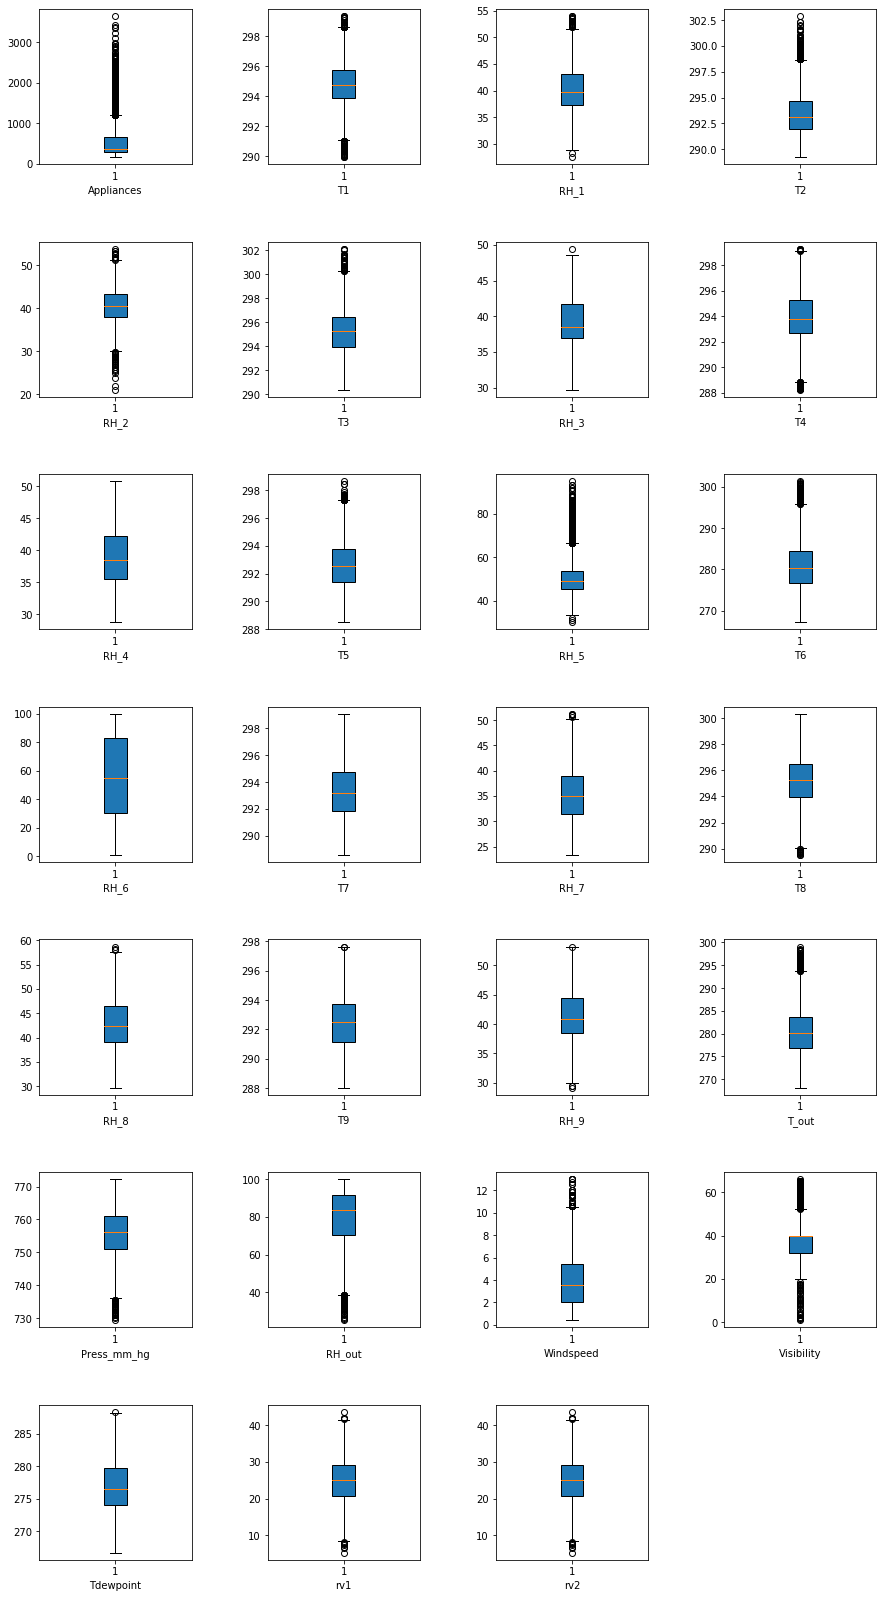

In [17]:
plt.subplots_adjust(bottom = 0.5, wspace = 0.5, hspace = 0.5)
plt.figure(figsize = (15,100))
for i in range(1,28):
    plt.subplots_adjust(bottom = 0.6, wspace = 0.5, hspace = 0.5)
    plt.subplot(9, 4, i)
    plt.xlabel(dfk.columns[i-1])
    plt.boxplot(dfk.columns[i-1],data=dfk, patch_artist=True)
plt.show()

In [18]:
Q1 = dfk.quantile(0.25)
Q3 = dfk.quantile(0.75)
IQR = Q3 - Q1
((dfk[dfk.columns ]< (Q1 - 1.5 * IQR)) | (dfk[dfk.columns] > (Q3 + 1.5 * IQR))).sum()

Appliances     345
T1              75
RH_1            21
T2              96
RH_2            41
T3              33
RH_3             1
T4              35
RH_4             0
T5              28
RH_5           209
T6              86
RH_6             0
T7               0
RH_7             5
T8              12
RH_8             3
T9               2
RH_9             4
T_out           71
Press_mm_hg     36
RH_out          43
Windspeed       38
Visibility     443
Tdewpoint        1
rv1             12
rv2             12
dtype: int64

In [19]:
dfkw=pd.DataFrame()
others=['RH_4','RH_6','T7']
for i in others:
    dfkw['w_%s'%i]=dfk[i]

In [20]:
#One by one, we kept winsorization low ratio because it might cause some side effects if we increase that ratio too much.

In [21]:
dfkw['w_Appliances']=winsorize(dfk.Appliances,(0,0.105))
dfkw['w_T1']=winsorize(dfk.T1,(0.05,0.05))
dfkw['w_RH_1']=winsorize(dfk.RH_1,(0.01,0.01))
dfkw['w_T2']=winsorize(dfk.T2,(0,0.04))
dfkw['w_RH_2']=winsorize(dfk.RH_2,(0.01,0.01))
dfkw['w_T3']=winsorize(dfk.T3,(0,0.02))
dfkw['w_T4']=winsorize(dfk.T4,(0.01,0.01))
dfkw['w_T5']=winsorize(dfk.T5,(0,0.01))
dfkw['w_RH_5']=winsorize(dfk.RH_5,(0.001,0.07))
dfkw['w_T6']=winsorize(dfk.T6,(0,0.05))
dfkw['w_RH_7']=winsorize(dfk.RH_7,(0,0.04))
dfkw['w_T_out']=winsorize(dfk.T_out,(0,0.04))
dfkw['w_Press_mm_hg']=winsorize(dfk.Press_mm_hg,(0.012,0))
dfkw['w_RH_out']=winsorize(dfk.RH_out,(0.02,0))
dfkw['w_Windspeed']=winsorize(dfk.Windspeed,(0,0.02))
dfkw['w_Visibility']=winsorize(dfk.Visibility,(0.05,0.125))
dfkw['w_RH_3']=winsorize(dfk.RH_3,(0,0.001))
dfkw['w_T8']=winsorize(dfk.T8,(0.05,0))
dfkw['w_RH_8']=winsorize(dfk.RH_8,(0,0.01))
dfkw['w_T9']=winsorize(dfk.T9,(0,0.001))
dfkw['w_RH_9']=winsorize(dfk.RH_9,(0.001,0.001))
dfkw['w_Tdewpoint']=winsorize(dfk.Tdewpoint,(0,0.001))
dfkw['w_rv1']=winsorize(dfk.rv1,(0.005,0.005))
dfkw['w_rv2']=winsorize(dfk.rv2,(0.005,0.005))

In [22]:
# Now, we get rid of outliers.
Q1 = dfkw.quantile(0.25)
Q3 = dfkw.quantile(0.75)
IQR = Q3 - Q1
sum(((dfkw[dfkw.columns ]< (Q1 - 1.5 * IQR)) | (dfkw[dfkw.columns] > (Q3 + 1.5 * IQR))).sum())

0

### 5. Exploring the Data

In [69]:
# We can see energy consumption by days or hours.
date_sum= dfk.groupby('day').sum()
px.line(date_sum, y = 'Appliances', x = date_sum.index).update_traces(mode='lines+markers')

In [24]:
hour_sum= dfk.groupby('hour').sum()
px.line(hour_sum, y = 'Appliances', x = hour_sum.index).update_traces(mode='lines+markers')

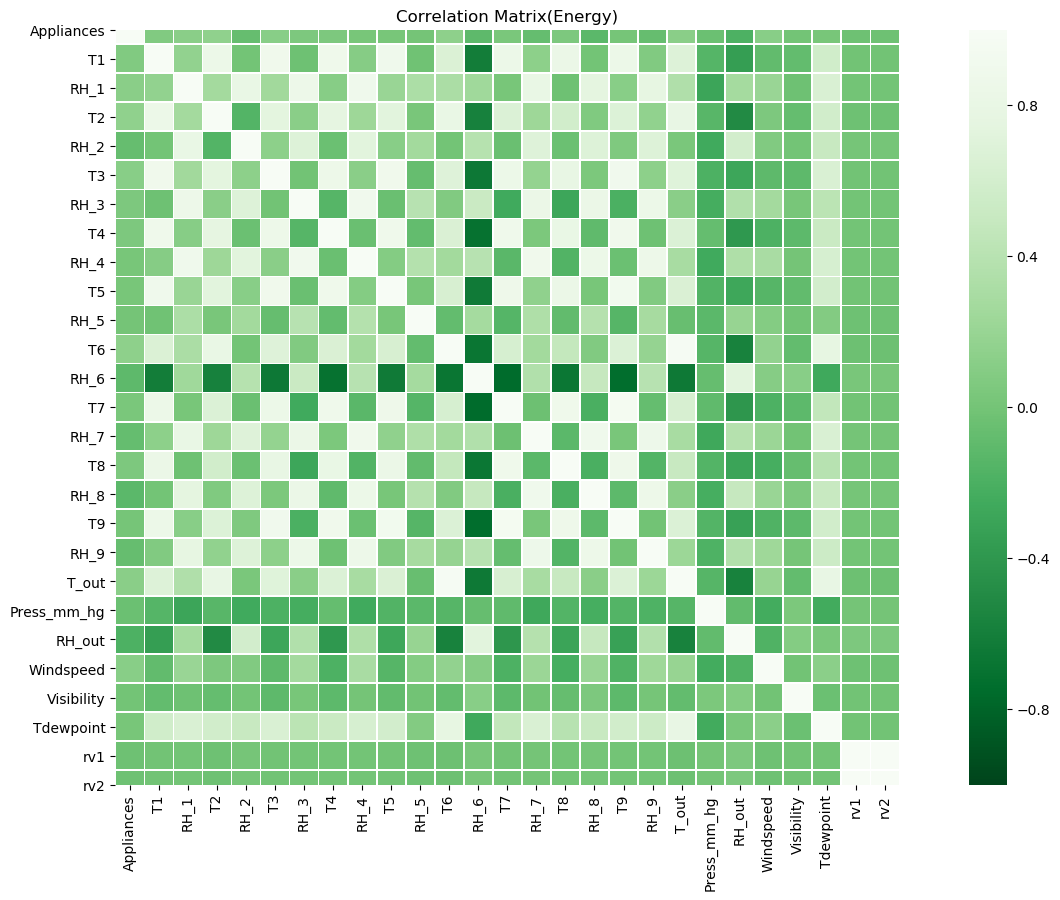

In [25]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfk.corr(),square=True,annot=False,linewidths=.5,vmin=-1,vmax=1,cmap='Greens_r')
plt.title('Correlation Matrix(Energy)')
plt.show()

In [26]:
high_corr=dfk.corr().Appliances.abs().sort_values(ascending=False).index[0:10]
dfk[high_corr].corr().Appliances

Appliances    1.000000
RH_out       -0.192946
T2            0.152521
T6            0.148259
T_out         0.124036
RH_1          0.122618
RH_8         -0.119843
T3            0.114080
Windspeed     0.112784
RH_6         -0.105512
Name: Appliances, dtype: float64

### 6.Building Models

#### First of all, Let's start with winsorized version (without outliers)

In [27]:
x=dfkw.drop('w_Appliances',axis=1)
y=dfkw.w_Appliances

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)
print("Train Data Count : {}".format(X_train.shape[0]))
print("Test Data Count   : {}".format(X_test.shape[0]))

Train Data Count : 2632
Test Data Count   : 658


In [29]:
X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           w_Appliances   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     43.47
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.28e-176
Time:                        15:33:24   Log-Likelihood:                -18417.
No. Observations:                2632   AIC:                         3.689e+04
Df Residuals:                    2606   BIC:                         3.704e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -693.6551   2021.390     -0.343      0.732   -4657.348    3270.037
w_RH_4            5.0483      5.051      0.999      0.318      -4.857      14.953
w_RH_6            1.4284      0.527      2.711      0.007       0.395       2.462
w_T7             -9.3351     10.317     -0.905      0.366     -29.566      10.896
w_T1             29.3171     14.687      1.996      0.046       0.519      58.116
w_RH_1           78.1923      5.384     14.523      0.000      67.635      88.750
w_T2            -79.9372     12.285     -6.507      0.000    -104.026     -55.848
w_RH_2          -56.2056      5.404    -10.401      0.000     -66.802     -45.610
w_T3             83.2624      8.494      9.802      0.000      66.606      99.919
w_T4             21.3689      7.588      2.816      0.005       6.489      36.248
w_T5              6.7369      9.282      0.726      0.468     -11.464      24.938
w_RH_5            1.4611      0.936      1.561      0.119      -0.374       3.297
w_T6             36.3985      5.303      6.863      0.000      26.000      46.797
w_RH_7           -4.8309      3.363     -1.436      0.151     -11.426       1.764
w_T_out         -35.9115      9.757     -3.681      0.000     -55.043     -16.780
w_Press_mm_hg    -0.4517      0.847     -0.533      0.594      -2.112       1.209
w_RH_out         -1.1154      1.753     -0.636      0.525      -4.553       2.322
w_Windspeed       8.6852      2.725      3.187      0.001       3.342      14.028
w_Visibility      0.9234      0.596      1.549      0.122      -0.246       2.093
w_RH_3           10.3253      5.481      1.884      0.060      -0.422      21.073
w_T8             49.5570      7.770      6.378      0.000      34.320      64.794
w_RH_8          -28.7636      2.877     -9.998      0.000     -34.405     -23.123
w_T9           -102.0488     13.591     -7.508      0.000    -128.699     -75.398
w_RH_9           -6.8033      3.263     -2.085      0.037     -13.202      -0.404
w_Tdewpoint       5.1322      8.650      0.593      0.553     -11.829      22.093
w_rv1             0.0170      0.444      0.038      0.969      -0.853       0.887
w_rv2             0.0170      0.444      0.038      0.969      -0.853       0.887
==============================================================================
Omnibus:                      378.770   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.688
Skew:                           1.054   Prob(JB):                    1.77e-122
Kurtosis:                       3.819   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-23. This mi

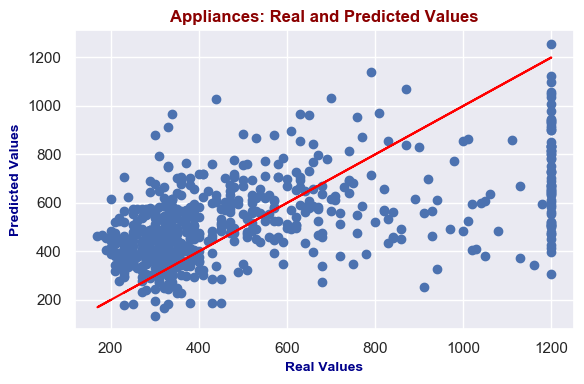

Root Mean Squared Error (RMSE)                : 254.948
Root Mean Squared Error (RMSE) of Train Set   : 264.692


In [30]:
X_test = sm.add_constant(X_test)
y_preds = model1.predict(X_test)
X_train= sm.add_constant(X_train)
y_preds_train = model1.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Appliances: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE)                : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set   : {:.3f}".format(rmse(y_train, y_preds_train)))

#### Second, try log transformation for dfk.

In [31]:
df3=dfk.copy()

In [32]:
dflog=pd.DataFrame()
for col in df3.columns:
    dflog['log_%s'%col]=np.log(df3[col])

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dflog)
min_max=scaler.transform(dflog)
scale_df=pd.DataFrame(min_max)

In [34]:
scale_df=scale_df.rename({0:'Appliances'},axis=1)

In [35]:
x=scale_df.drop('Appliances',axis=1)
y=scale_df['Appliances']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)
print("Train Data Count : {}".format(X_train.shape[0]))
print("Test Data Count   : {}".format(X_test.shape[0]))

Train Data Count : 2632
Test Data Count   : 658


In [37]:
X_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     49.73
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.12e-199
Time:                        15:33:26   Log-Likelihood:                 1019.0
No. Observations:                2632   AIC:                            -1986.
Df Residuals:                    2606   BIC:                            -1833.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1372      0.897     -1.268      0.205      -2.895       0.621
1              0.3344      0.091      3.673      0.000       0.156       0.513
2              1.5375      0.104     14.752      0.000       1.333       1.742
3             -0.9440      0.121     -7.788      0.000      -1.182      -0.706
4             -1.6665      0.161    -10.355      0.000      -1.982      -1.351
5              0.5692      0.061      9.370      0.000       0.450       0.688
6              0.1641      0.066      2.474      0.013       0.034       0.294
7              0.1534      0.052      2.953      0.003       0.052       0.255
8              0.1018      0.068      1.499      0.134      -0.031       0.235
9              0.0260      0.059      0.439      0.661      -0.090       0.142
10             0.0793      0.029      2.761      0.006       0.023       0.136
11             0.7658      0.109      7.040      0.000       0.552       0.979
12             0.0261      0.032      0.818      0.413      -0.037       0.089
13            -0.1246      0.067     -1.862      0.063      -0.256       0.007
14            -0.0471      0.056     -0.842      0.400      -0.157       0.063
15             0.4104      0.051      8.119      0.000       0.311       0.509
16            -0.5663      0.052    -10.874      0.000      -0.668      -0.464
17            -0.5939      0.082     -7.235      0.000      -0.755      -0.433
18            -0.1015      0.049     -2.092      0.037      -0.197      -0.006
19             2.0035      1.437      1.394      0.163      -0.814       4.821
20            -0.0044      0.023     -0.197      0.844      -0.049       0.040
21             1.8111      0.964      1.878      0.060      -0.080       3.702
22             0.0754      0.021      3.598      0.000       0.034       0.117
23             0.0915      0.041      2.248      0.025       0.012       0.171
24            -1.8825      1.052     -1.789      0.074      -3.946       0.181
25             0.0039      0.013      0.289      0.772      -0.022       0.030
26             0.0039      0.013      0.289      0.772      -0.022       0.030
==============================================================================
Omnibus:                      381.276   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.098
Skew:                           1.010   Prob(JB):                    7.28e-129
Kurtosis:                       4.140   Cond. No.                     1.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix 

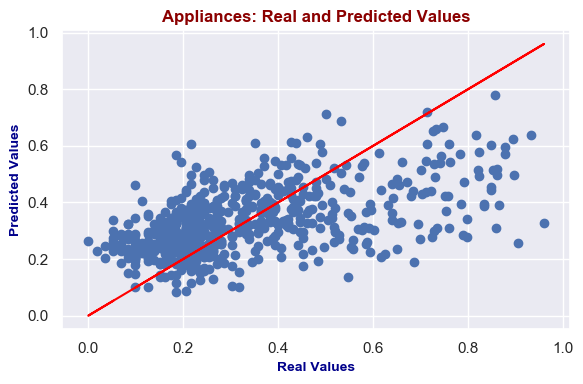

Root Mean Squared Error (RMSE) of Test Set      : 0.163
Root Mean Squared Error (RMSE) of Train Set     : 0.164


In [38]:
X_test = sm.add_constant(X_test)
y_preds = model2.predict(X_test)
X_train= sm.add_constant(X_train)
y_preds_train = model2.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Appliances: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE) of Test Set      : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set     : {:.3f}".format(rmse(y_train, y_preds_train)))

In [39]:
# Although I have used Log transformation, i got so low R_squared.

#### Thirdly, we will use winsorized dataframe and try log transformation for dfkw.

In [40]:
df3=dfkw.copy()

In [41]:
dflog=pd.DataFrame()
for col in df3.columns:
    dflog['log_%s'%col]=np.log(df3[col])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dflog)
min_max=scaler.transform(dflog)
scale_df=pd.DataFrame(min_max)

In [43]:
scale_df=scale_df.rename({0:'Appliances'},axis=1)

In [44]:
x=scale_df.drop('Appliances',axis=1)
y=scale_df['Appliances']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)
print("Train Data Count : {}".format(X_train.shape[0]))
print("Test Data Count   : {}".format(X_test.shape[0]))

Train Data Count : 2632
Test Data Count   : 658


In [46]:
X_train = sm.add_constant(X_train)
model3 = sm.OLS(y_train, X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1606.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:33:28   Log-Likelihood:                 4298.9
No. Observations:                2632   AIC:                            -8546.
Df Residuals:                    2606   BIC:                            -8393.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0452      0.022      2.100      0.036       0.003       0.087
1              0.0067      0.009      0.744      0.457      -0.011       0.024
2             -0.1151      0.019     -5.969      0.000      -0.153      -0.077
3              0.0049      0.004      1.196      0.232      -0.003       0.013
4              0.0294      0.015      1.966      0.049    7.16e-05       0.059
5              0.1369      0.018      7.606      0.000       0.102       0.172
6              0.2586      0.020     13.124      0.000       0.220       0.297
7              0.2150      0.021     10.376      0.000       0.174       0.256
8             -0.0826      0.014     -5.795      0.000      -0.111      -0.055
9             -0.2282      0.012    -18.348      0.000      -0.253      -0.204
10             0.0975      0.015      6.685      0.000       0.069       0.126
11             0.0085      0.006      1.478      0.140      -0.003       0.020
12             0.0467      0.024      1.917      0.055      -0.001       0.094
13             0.1477      0.013     11.549      0.000       0.123       0.173
14            -0.1662      0.045     -3.713      0.000      -0.254      -0.078
15             0.0202      0.005      3.740      0.000       0.010       0.031
16            -0.0735      0.022     -3.365      0.001      -0.116      -0.031
17             0.0266      0.006      4.789      0.000       0.016       0.038
18            -0.0077      0.003     -2.397      0.017      -0.014      -0.001
19             0.1988      0.017     11.637      0.000       0.165       0.232
20             0.0240      0.012      1.938      0.053      -0.000       0.048
21             0.0283      0.014      2.050      0.040       0.001       0.055
22            -0.0521      0.023     -2.240      0.025      -0.098      -0.007
23             0.1367      0.013     10.529      0.000       0.111       0.162
24             0.2527      0.037      6.761      0.000       0.179       0.326
25            -0.0018      0.003     -0.713      0.476      -0.007       0.003
26            -0.0018      0.003     -0.713      0.476      -0.007       0.003
==============================================================================
Omnibus:                       25.786   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.053
Skew:                          -0.155   Prob(JB):                     1.10e-07
Kurtosis:                       3.443   Cond. No.                     1.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [47]:
print('R-squared',model3.rsquared)
print('Adj. R-squared',model3.rsquared_adj)

R-squared 0.9390532546157615
Adj. R-squared 0.9384685774727815


In [48]:
X_test = sm.add_constant(X_test)
model3_test = sm.OLS(y_test, X_test).fit()

In [49]:
print('R-squared',model3_test.rsquared)
print('Adj. R-squared',model3_test.rsquared_adj)

R-squared 0.9472462519996694
Adj. R-squared 0.9451594739933272


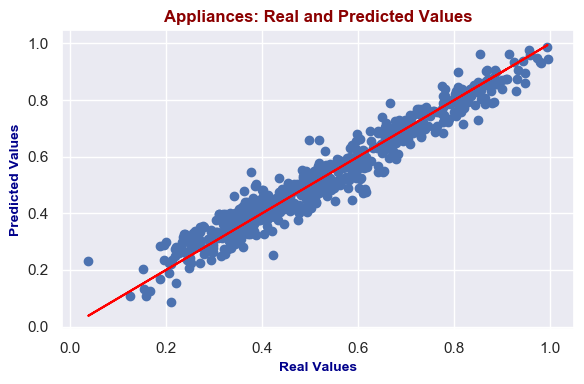

Root Mean Squared Error (RMSE) of Test Set         : 0.047
Root Mean Squared Error (RMSE) of Train Set        : 0.047


In [50]:
X_test = sm.add_constant(X_test)
y_preds = model3.predict(X_test)
y_preds_train = model3.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Appliances: Real and Predicted Values", fontdict=baslik_font)
plt.tight_layout()
plt.show()

print("Root Mean Squared Error (RMSE) of Test Set         : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set        : {:.3f}".format(rmse(y_train, y_preds_train)))

The RMSE for training and your test sets should be very similar if we want built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly overfitting of the data.

For this model(model3),RMSE values is very close each other.

In [51]:
# A pretty good prediction. Let's use Polynomial Features, maybe we can do better.

#### Fourthly, we will use Polynomial Features for dfkw (first,winsorized later log transformed)
To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn.

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
polynomial_features=PolynomialFeatures(degree=2)
poly_df=scale_df.drop('Appliances',axis=1)

In [54]:
poly_df1= polynomial_features.fit_transform(poly_df)
poly_df2 = pd.DataFrame(poly_df1)
poly_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,368,369,370,371,372,373,374,375,376,377
0,1.0,0.963020,0.170586,0.339406,0.141757,0.809116,0.351192,0.779685,0.272337,0.322425,...,0.539135,0.403673,0.530591,0.530591,0.302247,0.397276,0.397276,0.522182,0.522182,0.522182
1,1.0,0.970480,0.175570,0.936523,0.143145,0.778096,0.358954,0.771221,0.270206,0.319898,...,0.530224,0.386993,0.430716,0.430716,0.282453,0.314365,0.314365,0.349883,0.349883,0.349883
2,1.0,0.972777,0.235195,0.926776,0.249703,1.000000,0.432851,0.843262,0.300262,0.326214,...,0.531438,0.378339,0.646154,0.646154,0.269345,0.460007,0.460007,0.785632,0.785632,0.785632
3,1.0,0.969805,0.214280,0.759500,0.332541,0.903500,0.469426,0.824466,0.317466,0.349086,...,0.520541,0.361764,0.498915,0.498915,0.251418,0.346734,0.346734,0.478187,0.478187,0.478187
4,1.0,0.967786,0.236501,0.662097,0.394830,0.772547,0.507206,0.794688,0.334425,0.373316,...,0.503071,0.348989,0.333219,0.333219,0.242100,0.231160,0.231160,0.220715,0.220715,0.220715


In [55]:
poly_df2.columns=polynomial_features.get_feature_names()
poly_df2.head()

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x22^2,x22 x23,x22 x24,x22 x25,x23^2,x23 x24,x23 x25,x24^2,x24 x25,x25^2
0,1.0,0.963020,0.170586,0.339406,0.141757,0.809116,0.351192,0.779685,0.272337,0.322425,...,0.539135,0.403673,0.530591,0.530591,0.302247,0.397276,0.397276,0.522182,0.522182,0.522182
1,1.0,0.970480,0.175570,0.936523,0.143145,0.778096,0.358954,0.771221,0.270206,0.319898,...,0.530224,0.386993,0.430716,0.430716,0.282453,0.314365,0.314365,0.349883,0.349883,0.349883
2,1.0,0.972777,0.235195,0.926776,0.249703,1.000000,0.432851,0.843262,0.300262,0.326214,...,0.531438,0.378339,0.646154,0.646154,0.269345,0.460007,0.460007,0.785632,0.785632,0.785632
3,1.0,0.969805,0.214280,0.759500,0.332541,0.903500,0.469426,0.824466,0.317466,0.349086,...,0.520541,0.361764,0.498915,0.498915,0.251418,0.346734,0.346734,0.478187,0.478187,0.478187
4,1.0,0.967786,0.236501,0.662097,0.394830,0.772547,0.507206,0.794688,0.334425,0.373316,...,0.503071,0.348989,0.333219,0.333219,0.242100,0.231160,0.231160,0.220715,0.220715,0.220715


In [56]:
poly_df2['Appliances']=scale_df['Appliances']
high_corr=poly_df2.corr().Appliances.abs().sort_values(ascending=False).index[0:10]
poly_df2[high_corr].corr().Appliances

Appliances    1.000000
x12 x18       0.932759
x4 x12        0.930339
x4 x20        0.925294
x4 x22        0.919316
x4 x18        0.915676
x12 x22       0.907192
x18 x22       0.907050
x18 x20       0.904990
x18           0.899015
Name: Appliances, dtype: float64

In [57]:
# Now, we can start to built the model.

In [58]:
X=poly_df2.drop('Appliances',axis=1)
Y=poly_df2.Appliances


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 2632
Test Data Count: 658


In [60]:
X_train = sm.add_constant(X_train)
model4= sm.OLS(y_train, X_train).fit()
print('R-squared',model4.rsquared)
print('Adj. R-squared',model4.rsquared_adj)

R-squared 0.9732527169047198
Adj. R-squared 0.9691485743868119


In [61]:
X_test = sm.add_constant(X_test)
model4_test = sm.OLS(y_test, X_test).fit()

In [62]:
print('R-squared',model4_test.rsquared)
print('Adj. R-squared',model4_test.rsquared_adj)

R-squared 0.9907996461188884
Adj. R-squared 0.9803106433228328


In [63]:
# This model's is the best result.

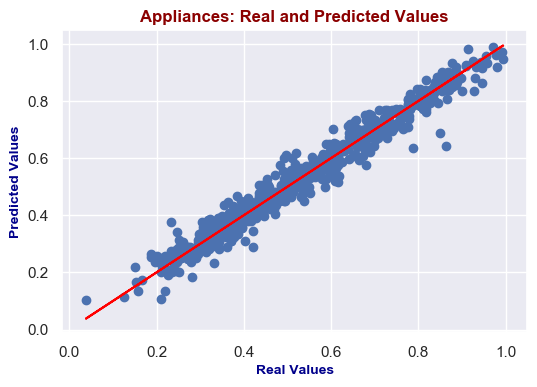

Root Mean Squared Error (RMSE) of Test Set         : 0.038
Root Mean Squared Error (RMSE) of Train Set        : 0.031


In [64]:
X_test = sm.add_constant(X_test)
y_preds = model4.predict(X_test)
y_preds_train =model4.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 12 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Appliances: Real and Predicted Values", fontdict=baslik_font)
plt.show()
pd.options.display.float_format = '${:,.3f}'.format
print("Root Mean Squared Error (RMSE) of Test Set         : {:.3f}".format(rmse(y_test, y_preds)))
print("Root Mean Squared Error (RMSE) of Train Set        : {:.3f}".format(rmse(y_train, y_preds_train)))

### 7. Results

As observed from results, Polynomial Features performs better than all other regression models in terms of all metrics.
In fact, this study reminded us the importance of the analysis part before establishing machine learning models. While setting up our regression models, an iterative process should be followed and changes should be made to increase the prediction performance by going back to the beginning.